# Exploratory Data Analysis of "La Redoute" reviews data from TrustedShops

#### Required packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#### Import review data of La Redoute

In [70]:
file = "redoute_v2.csv"
df = pd.read_csv(file, index_col = 0).drop("id", axis=1)
df.head()

,rating,title,comment,createdAt,transaction,updatedAt,totalLikeCount,customerCity,SupplierReply,SupplierReplyDate,...,weekday_of_transaction,transaction_in_weekend,reply_date,reply_year,reply_month,reply_day,reply_weekday,reply_in_weekend,cmtLenght,log_cmtLenght
0,4,Facilte,"Facilte, sollicitations dosées...qualité..on p...",2023-10-05 14:18:42,2023-09-23,NaN,NaN,NaN,NaN,NaN,...,5.0,1,NaN,NaN,NaN,NaN,NaN,0,1049,6.955593
1,4,Jolie table mais plus pour 6 que pour 8,Livraison impeccable avec possibilité de prend...,2023-10-02 13:08:27,2023-09-11,NaN,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,885,6.785588
2,4,Achat d'un canapé La Redoute intérieurs…,Achat d'un canapé La Redoute intérieurs le 6/9...,2023-09-18 16:52:21,2023-09-06,NaN,NaN,NaN,NaN,NaN,...,2.0,0,NaN,NaN,NaN,NaN,NaN,0,713,6.569481
3,4,excellent site mais des changements qui compl...,je commande depuis longtemps chez la redoute; ...,2023-10-13 08:57:16,2023-10-02,NaN,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,712,6.568078
4,5,"Comme d'habitude, aucun souci et rapidité d'ex...","Comme d'habitude, aucun souci et rapidité d'ex...",2023-09-21 11:09:15,2023-09-15,NaN,NaN,NaN,NaN,NaN,...,4.0,0,NaN,NaN,NaN,NaN,NaN,0,639,6.459904


In [71]:
# 1ere informations sur les données brutes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27399 entries, 0 to 34750
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating                  27399 non-null  int64  
 1   title                   27399 non-null  object 
 2   comment                 27399 non-null  object 
 3   createdAt               27399 non-null  object 
 4   transaction             23545 non-null  object 
 5   updatedAt               32 non-null     float64
 6   totalLikeCount          8 non-null      float64
 7   customerCity            2810 non-null   object 
 8   SupplierReply           5806 non-null   object 
 9   SupplierReplyDate       5806 non-null   object 
 10  date_of_cmt             27399 non-null  object 
 11  year_of_cmt             27399 non-null  int64  
 12  month_of_cmt            27399 non-null  int64  
 13  day_of_cmt              27399 non-null  int64  
 14  weekday_of_cmt          27399 non-null  int

## Analyse du texte des reviews

### Nettoyage du texte df["comment"]

In [73]:
### fonction qui, dans un texte, enlève tous les caractères spéciaux, ponctuation, linebreak, nombres etc
def clean_text(text):
    """
        input : un texte
        output : un texte sans les ponctuations, les caractères spéciaux, tout le texte en minuscule etc
    """
    # remove linebreaks
    text = text.replace('\n', ' ')

    # remove any punctuation character
    text = text.translate(str.maketrans('', '', string.punctuation))  # string.punctuation est mappé sur None

    # remove any digit
    text = text.translate(str.maketrans(' ', ' ', "0123456789"))

    # mets chaque caractère du texte en minuscule
    text = text.lower()

    return text
    

In [64]:
len(string.punctuation)

32

In [74]:
###  Apply the clean_text function to df["comment"]
df["comment"] = df["comment"].apply(clean_text)


In [179]:
### Define stop words
non_discrimant_words = ["achat","livraison", "article", "articles", "produit", "produits", "très", "bien"]
added_stopwords = ["avoir", "cela", "les", "de", "pour", "des", "cette", "a", "commande", "jai", "redoute", "car", "cest", "chez", "tout", "fait", "chez", "donc", "nest", "si", "alors", "nai", "faire", "deux", "comme", "jour"]
stop_words = stopwords.words('french') + added_stopwords + non_discrimant_words

In [180]:
### remove stop words from a comment text
df.loc[:,'comment'] = df.loc[:,'comment'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
df["comment"]

0        facilte sollicitations doséesqualitéon pourrai...
1        impeccable possibilité prendre rdv samedi mati...
2        dun canapé intérieurs site dabord bémol différ...
3        depuis longtemps appréciais choix rapidité fac...
4        dhabitude aucun souci rapidité dexpédition col...
                               ...                        
34746                                             horrible
34747                                                     
34748                                            mal coupé
34749                                            décevante
34750                                                 déçu
Name: comment, Length: 27399, dtype: object

### Wordcloud for comments on ratings >= 4

In [181]:
all_comments = ''.join(df[df["rating"]>=4]["comment"].values)

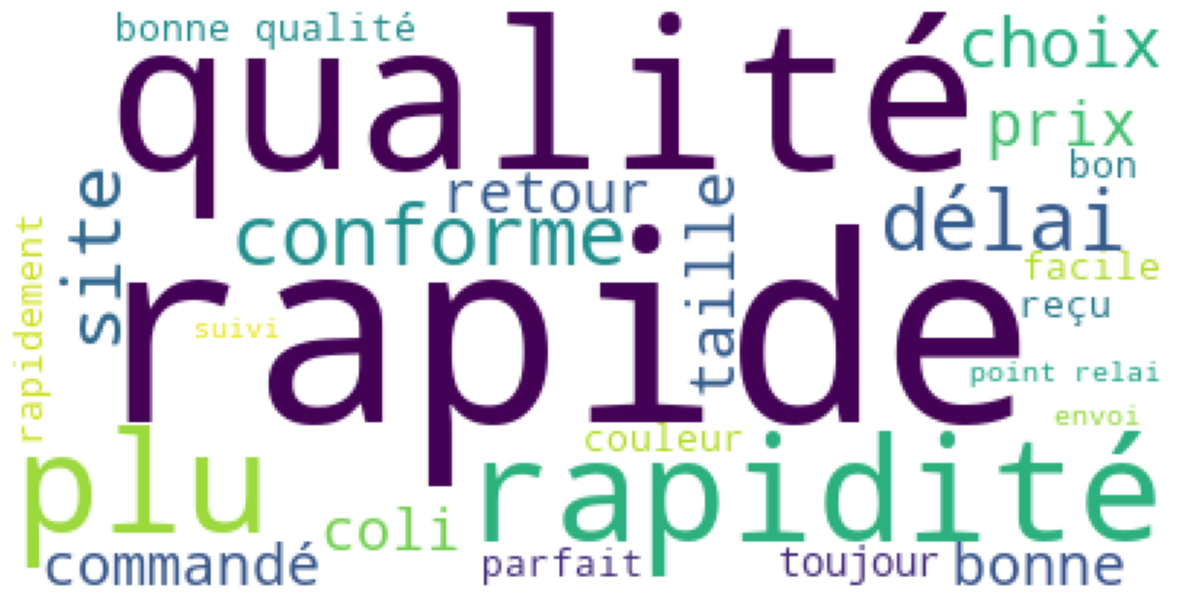

In [183]:
from wordcloud import WordCloud
from PIL import Image
wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, max_words = 25).generate(all_comments)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

### Wordcloud for comments on ratings <= 3

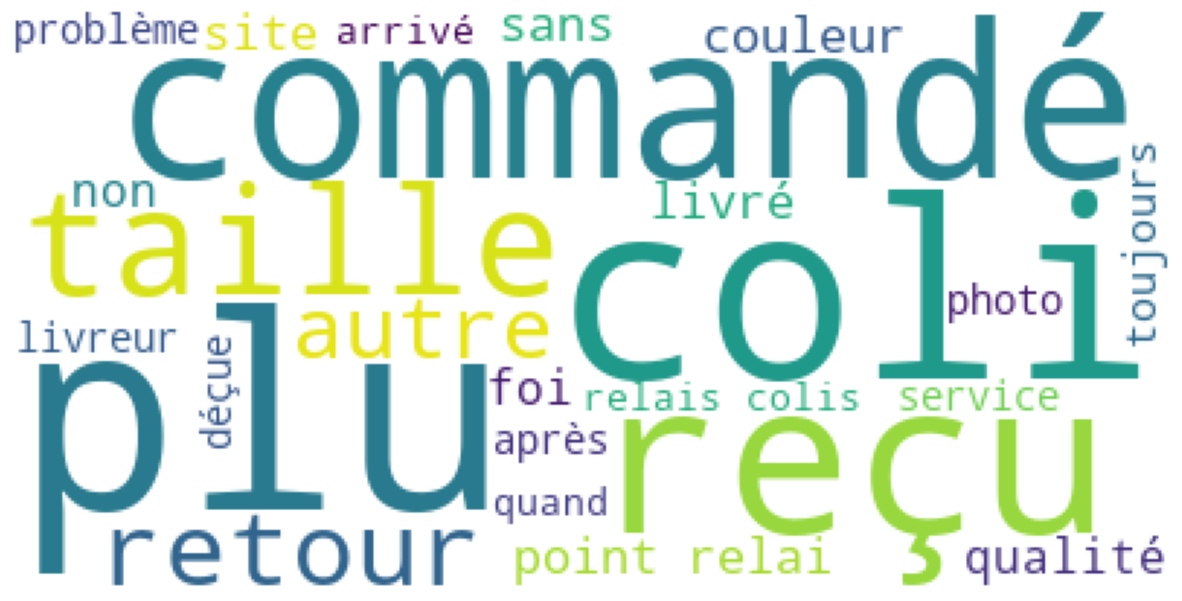

In [184]:
all_comments = ''.join(df[df["rating"]<=3]["comment"].values)

wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, max_words = 25).generate(all_comments)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [164]:
from collections import Counter
dico = Counter(all_comments.split())
df_text = pd.DataFrame({"occurence_count":dico.values()}, index = dico.keys())
x = df_text.sort_values(by= "occurence_count", ascending = False)
x[:10]

,occurence_count
livraison,831
colis,768
plus,741
très,640
reçu,463
relais,445
bien,349
qualité,322
commandé,317
produit,307


In [169]:
keyword = "coli"
df["keyword_counts"] = df["comment"].apply(lambda x: x.count(keyword))

In [168]:
df["keyword_counts"].value_counts()

keyword_counts
0    24512
1     2662
2      204
3       19
4        1
5        1
Name: count, dtype: int64

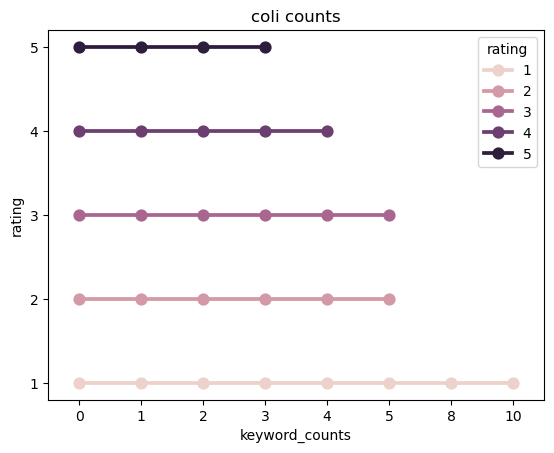

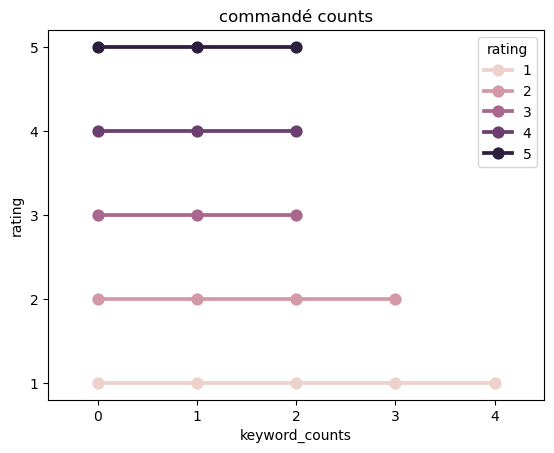

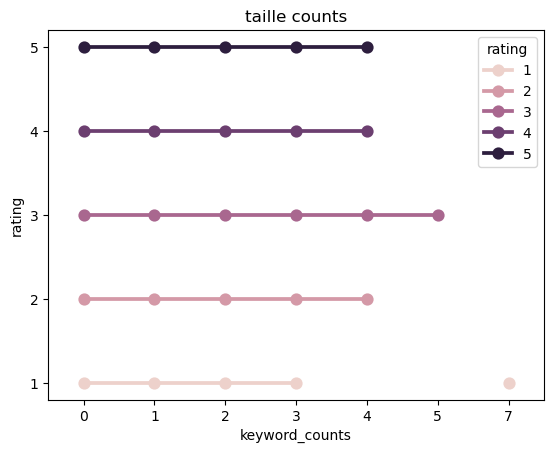

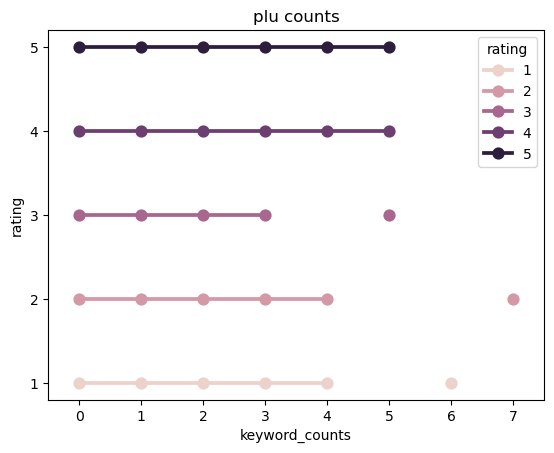

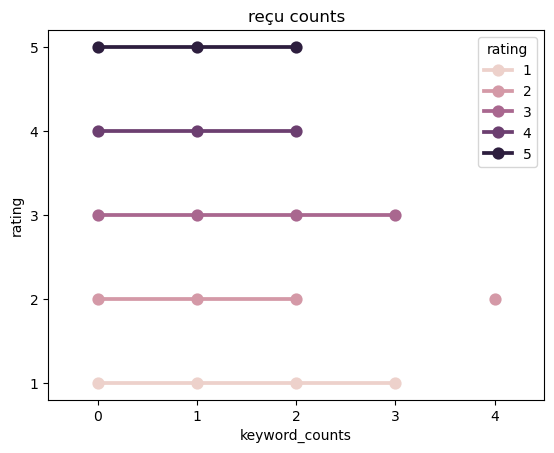

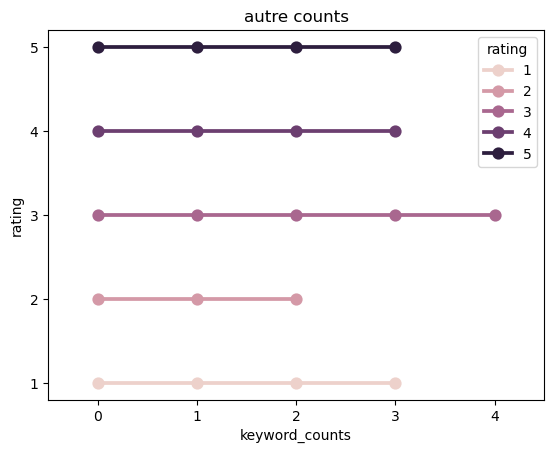

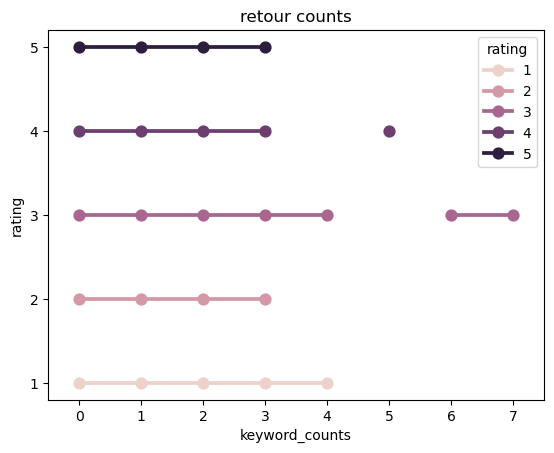

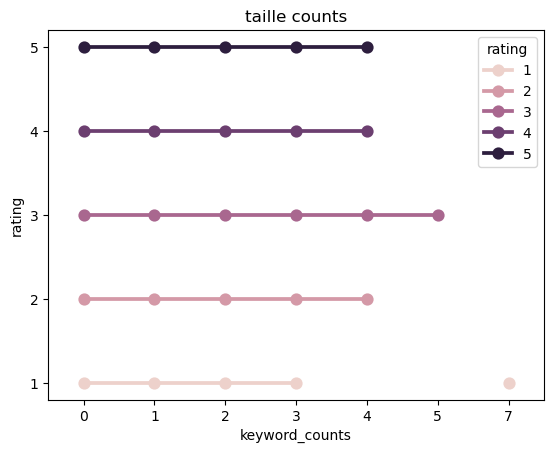

In [199]:
for keyword in ["coli", "commandé", "taille", "plu", "reçu", "autre", "retour", "taille"]:
    df["keyword_counts"] = df["comment"].apply(lambda x: x.count(keyword))
    sns.pointplot(data = df, x = "keyword_counts", y = "rating", hue = "rating")
    plt.yticks([1, 2, 3, 4, 5])
    plt.title(keyword + " counts")
    plt.show()
